In [31]:
!pip install nltk

You should consider upgrading via the 'c:\users\kim\desktop\optiver_project\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [35]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Kim\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [36]:

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
import string

def remove_Stopwords(text):
    stop_words = set(stopwords.words('english')) 
    words = word_tokenize( text.lower() ) 
    sentence = [w for w in words if not w in stop_words]
    return " ".join(sentence)

def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer() 
    sentences=sent_tokenize(text)
    for sentence in sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist) 

def clean_text(text): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr]) 
    
    return text2.lower()

In [95]:
import pandas as pd

df = pd.read_csv('edited_dataset.csv')
df

,Tweet,Category
0,The US 10yr yield is down to 3 75 after briefl...,-1
1,that was quick rolling_on_the_floor_laughing d...,-1
2,news Alphabet PT Cut to 136 from 145 Maintains...,-1
3,i had to go through like 6 menus and sub menus...,-1
4,user Buffett isnt interested in AAP at this va...,-1
...,...,...
1709,$BBBY ALL THESE LEVELS POSTED AHEAD OF TIME BE...,1
1710,RT @stockplaymaker1: Watch out for $GME $AMC $...,1
1711,Watch out for $GME $AMC $BBBY 📈,1
1712,$BBBY ALL THESE LEVELS POSTED AHEAD OF TIME BE...,1


In [53]:
!pip install spacy_langdetect
!pip install spacy
!pip install emoji
import emoji
import spacy
from spacy_langdetect import LanguageDetector
from spacy.language import Language
import re

You should consider upgrading via the 'c:\users\kim\desktop\optiver_project\venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\kim\desktop\optiver_project\venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\kim\desktop\optiver_project\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [59]:

def minimal_preprocess(tweet):
    # Remove new line character
    tweet = re.sub(r'\n', ' ', tweet)
    tweet = emoji.demojize(tweet, delimiters=("", " "))
    # Remove HTML special entities
    tweet = re.sub(r'\&\w*;', '', tweet)
    # Remove @username
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove hyperlinks
    tweet = re.sub(r"http\S+", "", tweet)
    # Remove tickers
    tweet = re.sub(r'\$[a-zA-Z]+', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # tweet = re.sub(r'[' + punctuation + ']+', '', tweet)
    tweet = re.sub(r"['’]",'', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ')
    # tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF')
    # Replace duplicated words separated by non-word characters with single word 
    tweet = re.sub(r'\b(\w+)(?:\W\1\b)+', r'\1', tweet)
    return tweet

def is_english(tweets):
    nlp = spacy.load("en_core_web_sm")
    def get_lang_detector(nlp, name):
      return LanguageDetector()
    try:
        Language.factory("language_detector", func=get_lang_detector)
    except:
        pass
    nlp.add_pipe('language_detector', last=True)
    def english(tweet):
        if not tweet.isascii():
          return False
        doc = nlp(tweet)
        if doc._.language["language"] == 'en':
          return True
        else:
          return False
    return tweets.map(lambda x: english(x))

def clean_data(raw_data: pd.DataFrame):
    data = raw_data.copy()
    data['Tweet'] = data['Tweet'].apply(minimal_preprocess)
    spams_pattern_stw = ['Trending', 'new alert at', 'Bull Forecasts']
    for pat in spams_pattern_stw:
        pat_mask = data['Tweet'].str.startswith(pat)
        data = data[~pat_mask]
    spams_pattern_ctn = ['top', 'join', 'Buy better sell smarter With our trade signals']
    for pat in spams_pattern_ctn:
        pat_mask = data['Tweet'].str.contains(pat.lower(), case=False)
        data = data[~pat_mask]  
    data.drop_duplicates(inplace=True)
    non_empty = data['Tweet'].str.len() > 0
    data = data[non_empty]
    # english = is_english(data['Tweet'])
    # data = data[english]
    return data

In [96]:
df = clean_data(df)
df['Tweet'] = df['Tweet'].apply(clean_text)
# df['Tweet'] = df['Tweet'].apply(remove_Stopwords)
df['Tweet'] = df['Tweet'].apply(lemmatize_text)

In [63]:
df_negative = df[df["Category"] == -1]
df_neutral = df[df["Category"] == 0]
df_positive = df[df["Category"] == 1]
print(len(df_negative))
print(len(df_positive))
print(len(df_neutral))
df_positive

279
311
695


,Tweet,Category
1117,tried to breakout after holding 3838 early thi...,1
1118,sensex jump over 300 point nifty touch 10 500 ...,1
1119,continuation expecting profit taking 2moro the...,1
1120,sharing all their good news before earnings an...,1
1121,goog cross above 800 wow,1
...,...,...
1694,guy we need to suport buy more stuff now or never,1
1698,most mentioned ticker on rwallstreetbets for t...,1
1710,rt watch out for chartincreasing,1
1711,watch out for chartincreasing,1


In [64]:

df_negative['Num_words_text'] = df_negative['Tweet'].apply(lambda x:len(str(x).split())) 
df_positive['Num_words_text'] = df_positive['Tweet'].apply(lambda x:len(str(x).split()))
df_positive['Num_words_text'] = df_neutral['Tweet'].apply(lambda x:len(str(x).split()))

C:\Users\Kim\AppData\Local\Temp/ipykernel_23708/2334021538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negative['Num_words_text'] = df_negative['Tweet'].apply(lambda x:len(str(x).split()))
C:\Users\Kim\AppData\Local\Temp/ipykernel_23708/2334021538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive['Num_words_text'] = df_positive['Tweet'].apply(lambda x:len(str(x).split()))
C:\Users\Kim\AppData\Local\Temp/ipykernel_23708/2334021538.py:3: SettingWithCopyWarning: 
A value is trying to b

In [43]:
!pip install wordcloud

You should consider upgrading via the 'c:\users\kim\desktop\optiver_project\venv\scripts\python.exe -m pip install --upgrade pip' command.


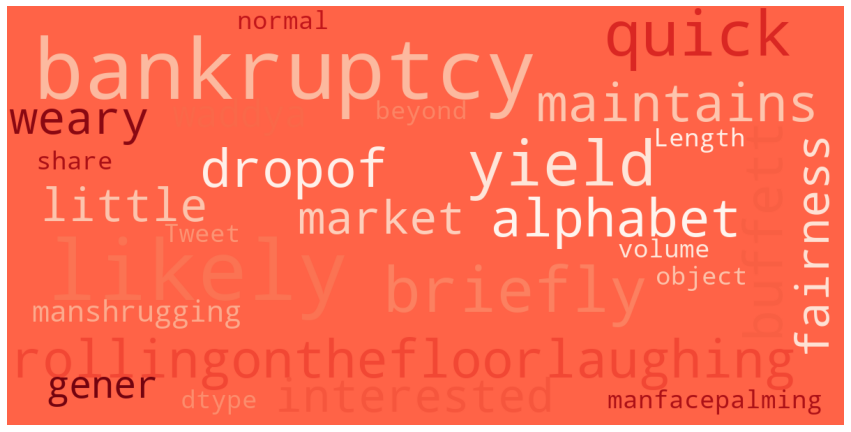

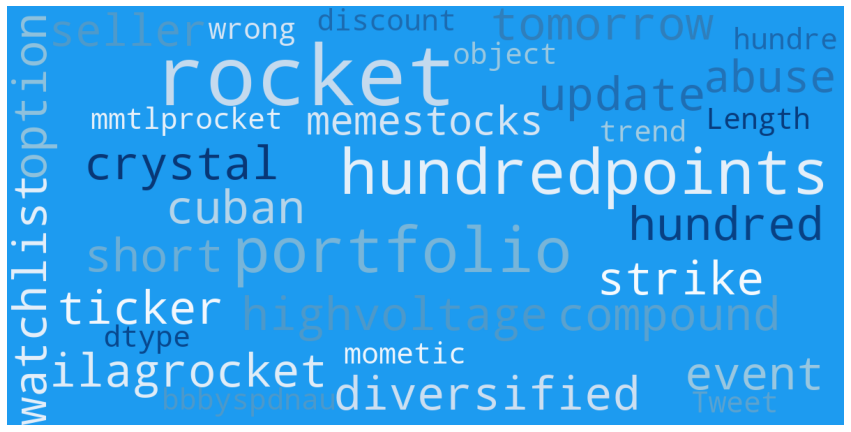

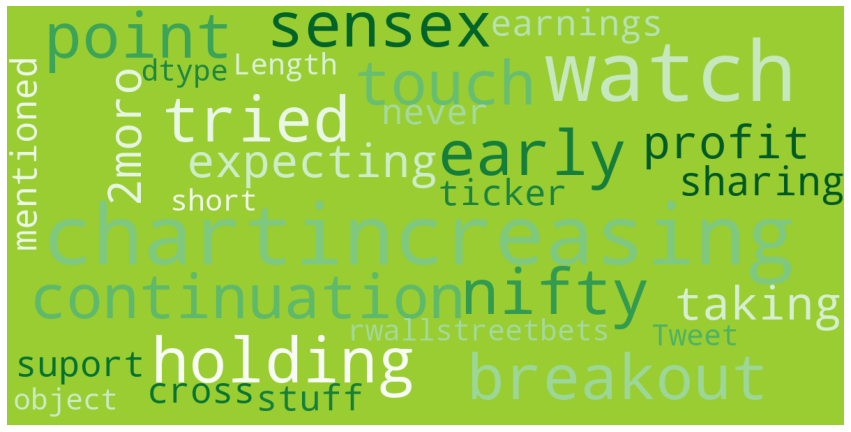

In [91]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def show_wordcloud(data, color, filename, colormap, title = None):
    wordcloud = WordCloud(
        background_color=color,
        colormap=colormap,
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        min_word_length=5,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    f = open(f"{filename}.svg","w+")
    f.write(wordcloud.to_svg(embed_font=True))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


show_wordcloud(df_negative['Tweet'], "Tomato", 'Negative', colormap="Reds")
show_wordcloud(df_neutral['Tweet'], "#1D9BF0", 'Neutral', colormap="Blues")
show_wordcloud(df_positive['Tweet'], "YellowGreen", 'Positive', colormap="Greens")

In [86]:
for row in df_positive['Tweet']:
    if 'dtype' in row:
        print(row)

In [92]:
!pip install plotly

You should consider upgrading via the 'c:\users\kim\desktop\optiver_project\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [128]:
import plotly.express as px
import numpy as np
tree_df = df.copy()
tree_df['Category'] = tree_df['Category'].map(({0: 'Neutral', 1: 'Positive', -1: 'Negative'}))
print(tree_df)
fig = px.treemap(tree_df, path=[px.Constant("Dataset"), 'Category'], color='Category', color_discrete_map={'Positive':'YellowGreen', 'Negative':'Tomato', 'Neutral':'#1D9BF0', 'Dataset': 'White'})
fig.update_layout(margin = dict(t=10, l=10, r=10, b=10))
fig.show()
fig.write_html("TreeMap.html")

                                                  Tweet  Category
0     the u 10yr yield is down to 3 75 after briefly...  Negative
1     that wa quick rollingonthefloorlaughing dropof...  Negative
2     news alphabet pt cut to 136 from 145 maintains...  Negative
3     i had to go through like 6 menu and sub menu t...  Negative
4     user buffett isnt interested in aap at this va...  Negative
...                                                 ...       ...
1698  most mentioned ticker on rwallstreetbets for t...  Positive
1709  all these level posted ahead of time before th...  Positive
1710                   rt watch out for chartincreasing  Positive
1711                      watch out for chartincreasing  Positive
1713       tsla short bbby call tsla wil go down to 135  Positive

[1304 rows x 2 columns]
